# Preprocessing and Scaling

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Scaling

### Different Kinds of Scaling

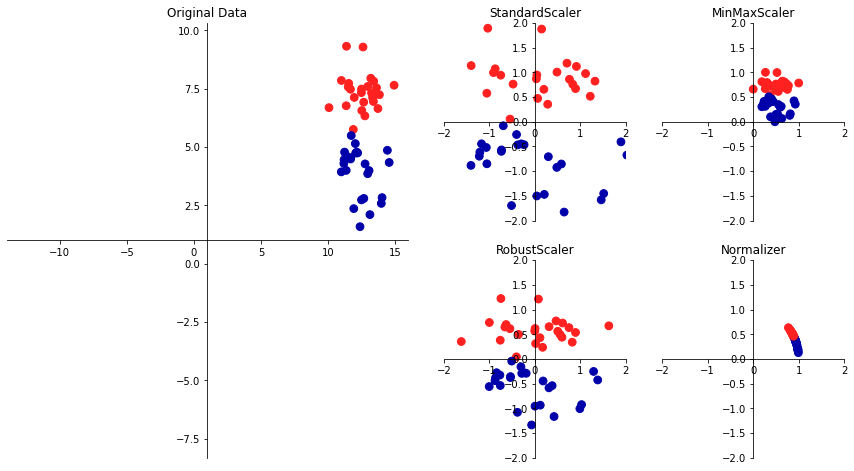

In [2]:
from helpers import plot_scaling

plot_scaling.plot_scaling()

### Applying Data Transformations

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

In [5]:
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
scaler.fit(X_train)

MinMaxScaler()

In [9]:
# transform data
X_train_scaled = scaler.transform(X_train)

In [10]:
# print dataset properties before and after scaling
print(f"transformed shape: {X_train_scaled.shape}")
print(f"per-feature minimum before scaling:\n {X_train.min(axis=0)}")
print(f"per-feature maximum before scaling:\n {X_train.max(axis=0)}")
print(f"per-feature minimum after scaling:\n {X_train_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n {X_train_scaled.max(axis=0)}")

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [11]:
# transform test data
X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling
print(f"per-feature minimum after scaling:\n{X_test_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n{X_test_scaled.max(axis=0)}")

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


### Scaling Training and Test Data the Same Way

In [12]:
from sklearn.datasets import make_blobs

In [13]:
#make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

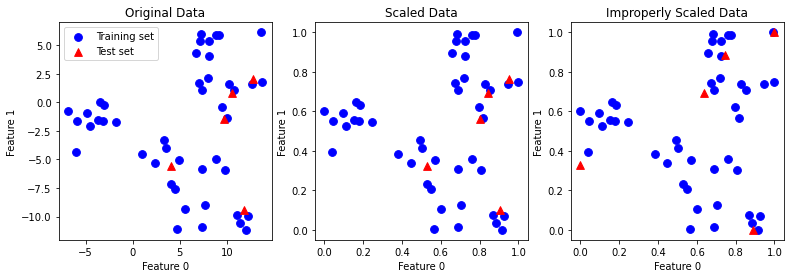

In [14]:
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(X_train[:, 0], X_train[:, 1], c="blue", label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^', c="red", label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c="blue", label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',c="red", label="Test set", s=60)
axes[1].set_title("Scaled Data")

# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c="blue", label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^', c="red", label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")

for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X).transform(X)

# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X)

### The Effect of Preprocessing on Supervised Learning

In [19]:
from sklearn.svm import SVC

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svm = SVC(C=100, gamma="auto")
svm.fit(X_train, y_train)

print(f"Test set accuracy: {svm.score(X_test, y_test):.2f}")

Test set accuracy: 0.63


In [20]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm = SVC(C=100, gamma="auto")
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print(f"Scaled test set accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Scaled test set accuracy: 0.97


In [22]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print(f"Test set accuracy: {svm.score(X_test_scaled, y_test):.2f}")

Test set accuracy: 0.96


## Principal Component Analysis (PCA)

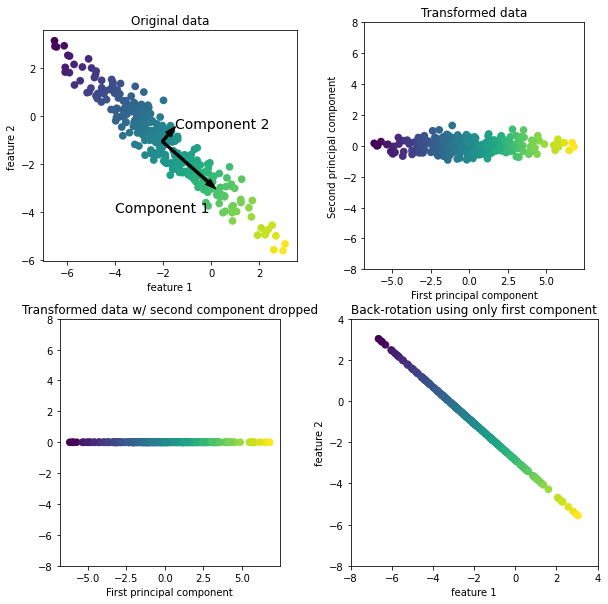

In [23]:
from helpers.plot_pca import plot_pca_illustration

plot_pca_illustration()

### Applying PCA to the cancer dataset for visualization

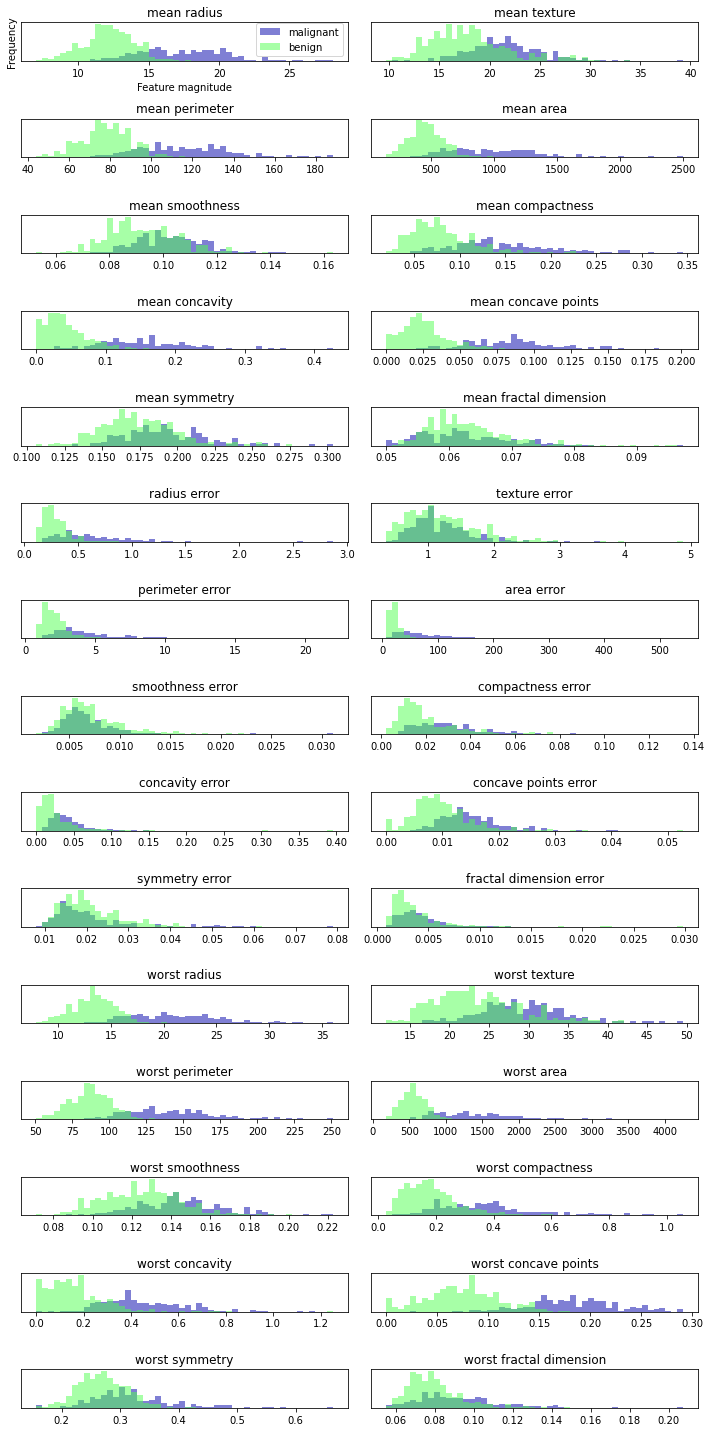

In [24]:
from helpers import plot_helpers

fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=plot_helpers.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=plot_helpers.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()
plt.show()

---

In [29]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [30]:
from sklearn.decomposition import PCA

# keep the first two principal components of the data
pca = PCA(n_components=2)

# fit PCA model to breast cancer data
pca.fit(X_scaled)

PCA(n_components=2)

In [31]:
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print(f"Original shape: {str(X_scaled.shape)}")
print(f"Reduced shape: {str(X_pca.shape)}")

Original shape: (569, 30)
Reduced shape: (569, 2)


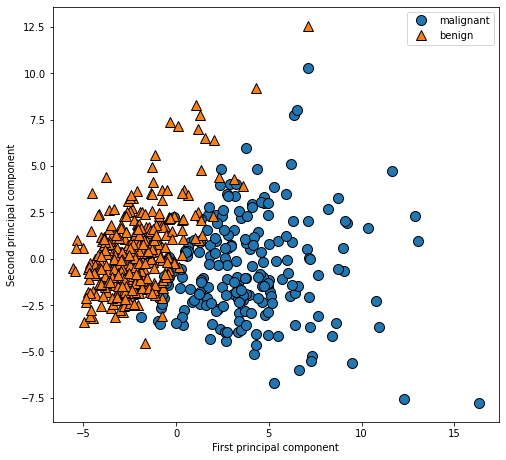

In [32]:
from helpers.plot_helpers import discrete_scatter

# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)

plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

plt.show()

In [33]:
print(f"PCA component shape: {pca.components_.shape}")

PCA component shape: (2, 30)


In [34]:
print(f"PCA components:\n{pca.components_}")

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


### Eigenfaces for feature extraction

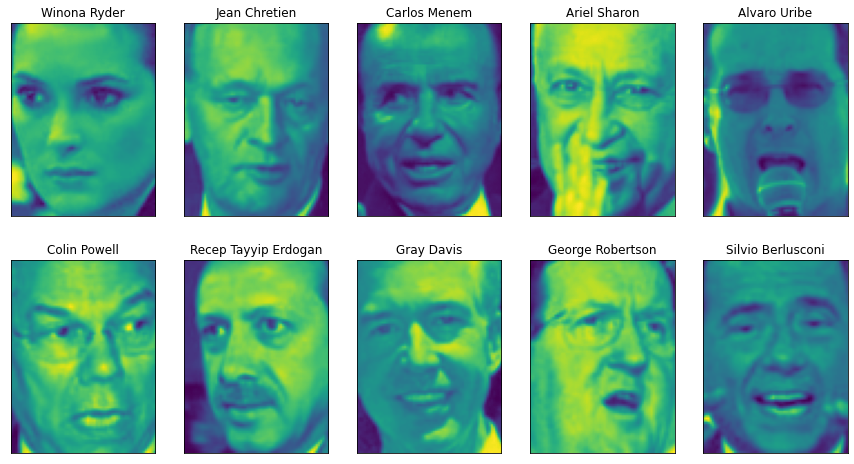

In [35]:
from sklearn.datasets import fetch_lfw_people

people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': (), 'yticks': ()})

for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    
plt.show()

In [36]:
print(f"people.images.shape: {people.images.shape}")
print(f"Number of classes: {len(people.target_names)}")

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [37]:
#count how often each target appears
counts = np.bincount(people.target)

# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print(f"{name:25} {count:3}", end=' ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [38]:
mask = np.zeros(people.target.shape, dtype=bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print(f"Test set score of 1-nn: {knn.score(X_test, y_test):.2f}")

Test set score of 1-nn: 0.23


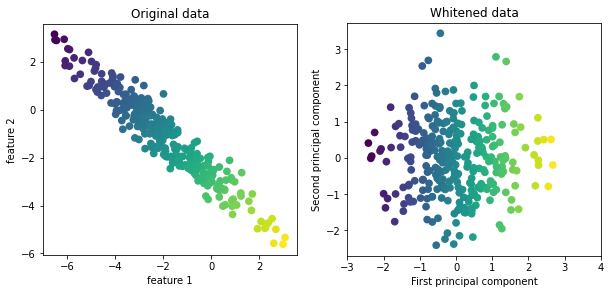

In [41]:
from helpers.plot_pca import plot_pca_whitening

plot_pca_whitening()

In [42]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [43]:
print(f"X_train_pca.shape: {X_train_pca.shape}")

X_train_pca.shape: (1547, 100)


In [44]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print(f"Test set accuracy: {knn.score(X_test_pca, y_test):.2f}")

Test set accuracy: 0.31


In [45]:
print(f"pca.components_.shape: {pca.components_.shape}")

pca.components_.shape: (100, 5655)


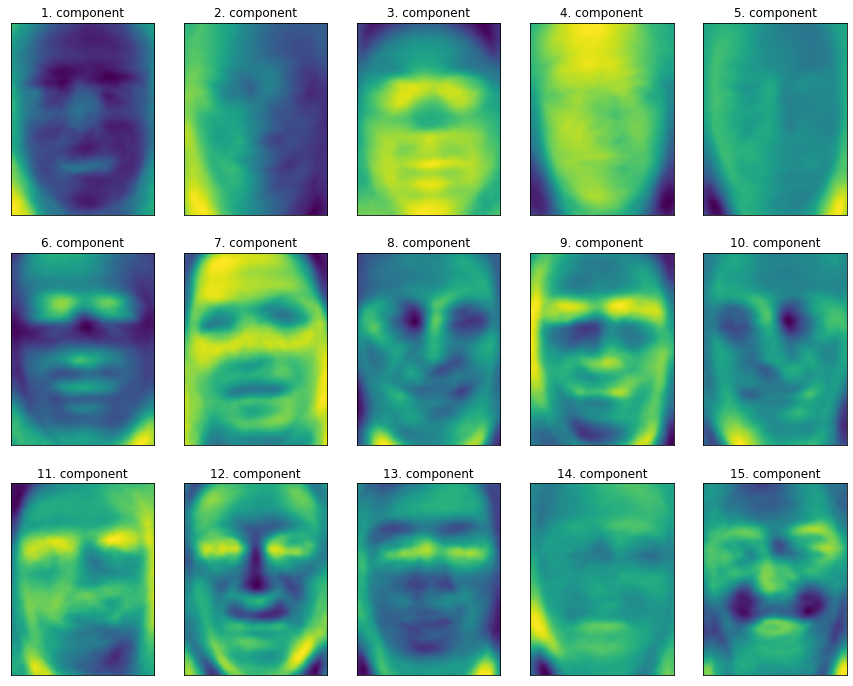

In [46]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': (), 'yticks': ()})

for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))
    
plt.show()

---

________________________________________________________________________________
[Memory] Calling helpers.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 7.1s, 0.1min


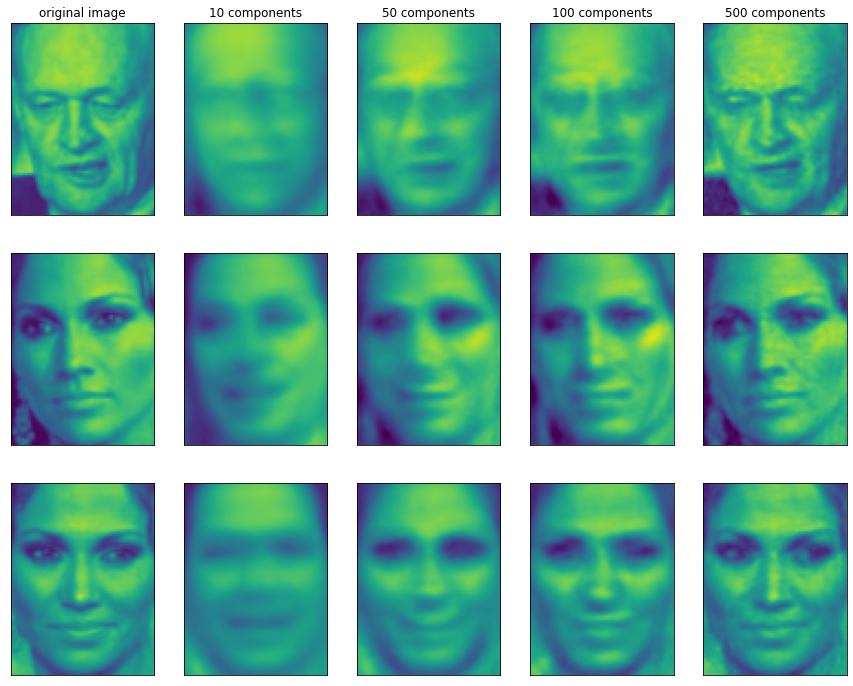

In [47]:
from helpers.plot_pca import plot_pca_faces

plot_pca_faces(X_train, X_test, image_shape)

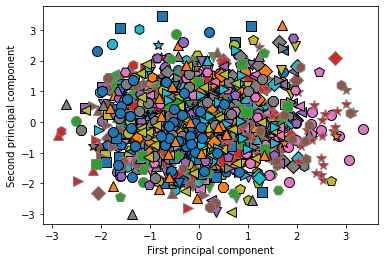

In [48]:
discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

---

## Non-Negative Matrix Factorization (NMF)

### Applying NMF to synthetic data

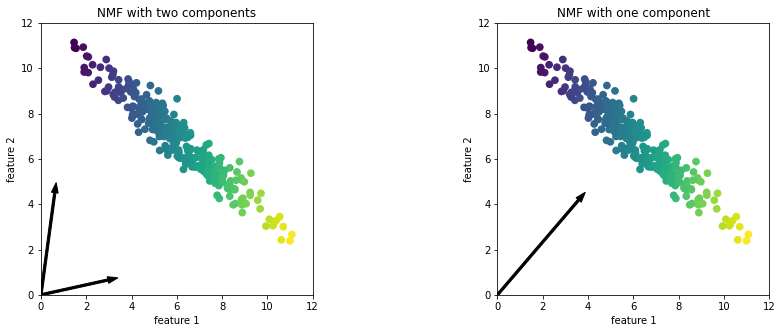

In [49]:
from helpers.plot_nmf import plot_nmf_illustration

plot_nmf_illustration()

### Example: Dimensionality Reduction in Eurovision Data

In [50]:
import seaborn as sns

In [51]:
eurovision = pd.read_csv("data/eurovision-2016.csv")


In [53]:
eurovision.head(10)

,From country,To country,Jury A,Jury B,Jury C,Jury D,Jury E,Jury Rank,Televote Rank,Jury Points,Televote Points
0,Albania,Belgium,20,16,24,22,24,25,14,NaN,NaN
1,Albania,Czech Republic,21,15,25,23,16,22,22,NaN,NaN
2,Albania,The Netherlands,22,14,23,24,21,24,24,NaN,NaN
3,Albania,Azerbaijan,19,12,11,21,11,13,19,NaN,NaN
4,Albania,Hungary,8,13,9,14,9,10,10,1.0,1.0
5,Albania,Italy,4,10,3,7,2,3,2,8.0,10.0
6,Albania,Israel,10,2,18,4,12,8,17,3.0,NaN
7,Albania,Bulgaria,11,3,6,13,6,7,3,4.0,8.0
8,Albania,Sweden,16,8,15,6,15,11,8,NaN,3.0
9,Albania,Germany,18,17,20,11,17,18,15,NaN,NaN


In [54]:
televote_rank = eurovision.pivot(index="From country", columns="To country", values="Televote Rank")

In [55]:
televote_rank.head(10)

To country,Armenia,Australia,Austria,Azerbaijan,Belgium,Bulgaria,Croatia,Cyprus,Czech Republic,France,...,Lithuania,Malta,Poland,Russia,Serbia,Spain,Sweden,The Netherlands,Ukraine,United Kingdom
From country,,,,,,,,,,,,,,,,,,,,,
Albania,9.0,1.0,13.0,19.0,14.0,3.0,20.0,12.0,22.0,11.0,...,7.0,16.0,6.0,4.0,26.0,23.0,8.0,24.0,5.0,18.0
Armenia,NaN,12.0,7.0,25.0,17.0,15.0,22.0,5.0,18.0,4.0,...,21.0,6.0,10.0,1.0,23.0,13.0,9.0,11.0,2.0,20.0
Australia,12.0,NaN,8.0,22.0,1.0,2.0,18.0,13.0,25.0,4.0,...,10.0,5.0,15.0,6.0,17.0,9.0,20.0,16.0,3.0,7.0
Austria,12.0,8.0,NaN,24.0,14.0,6.0,19.0,16.0,23.0,10.0,...,20.0,25.0,1.0,3.0,7.0,15.0,4.0,5.0,2.0,22.0
Azerbaijan,25.0,9.0,11.0,NaN,16.0,3.0,21.0,17.0,20.0,7.0,...,18.0,6.0,8.0,1.0,24.0,15.0,12.0,19.0,2.0,23.0
Belarus,4.0,10.0,13.0,3.0,18.0,7.0,23.0,11.0,25.0,14.0,...,12.0,22.0,5.0,1.0,24.0,17.0,9.0,21.0,2.0,26.0
Belgium,4.0,7.0,8.0,22.0,NaN,6.0,25.0,14.0,23.0,3.0,...,12.0,15.0,1.0,5.0,24.0,11.0,10.0,2.0,9.0,18.0
Bosnia & Herzegovina,12.0,8.0,6.0,3.0,15.0,9.0,2.0,13.0,20.0,7.0,...,23.0,19.0,14.0,5.0,1.0,17.0,11.0,21.0,4.0,25.0
Bulgaria,3.0,6.0,7.0,10.0,13.0,NaN,25.0,4.0,24.0,12.0,...,15.0,19.0,5.0,1.0,11.0,17.0,8.0,23.0,2.0,21.0


In [56]:
televote_rank.fillna(televote_rank.min(), inplace=True)

In [57]:
televote_rank.shape

(42, 26)

In [58]:
from sklearn.decomposition import NMF

model = NMF(n_components=2, init="random", max_iter=5000)
model.fit(televote_rank)

nmf_features = model.transform(televote_rank)

In [59]:
nmf_features.shape

(42, 2)

In [61]:
nmf_features[:5]

array([[2.49533944, 2.99701778],
       [2.15056971, 2.81789503],
       [2.04799927, 2.88264583],
       [3.08014574, 1.85457063],
       [2.19299416, 2.72219664]])

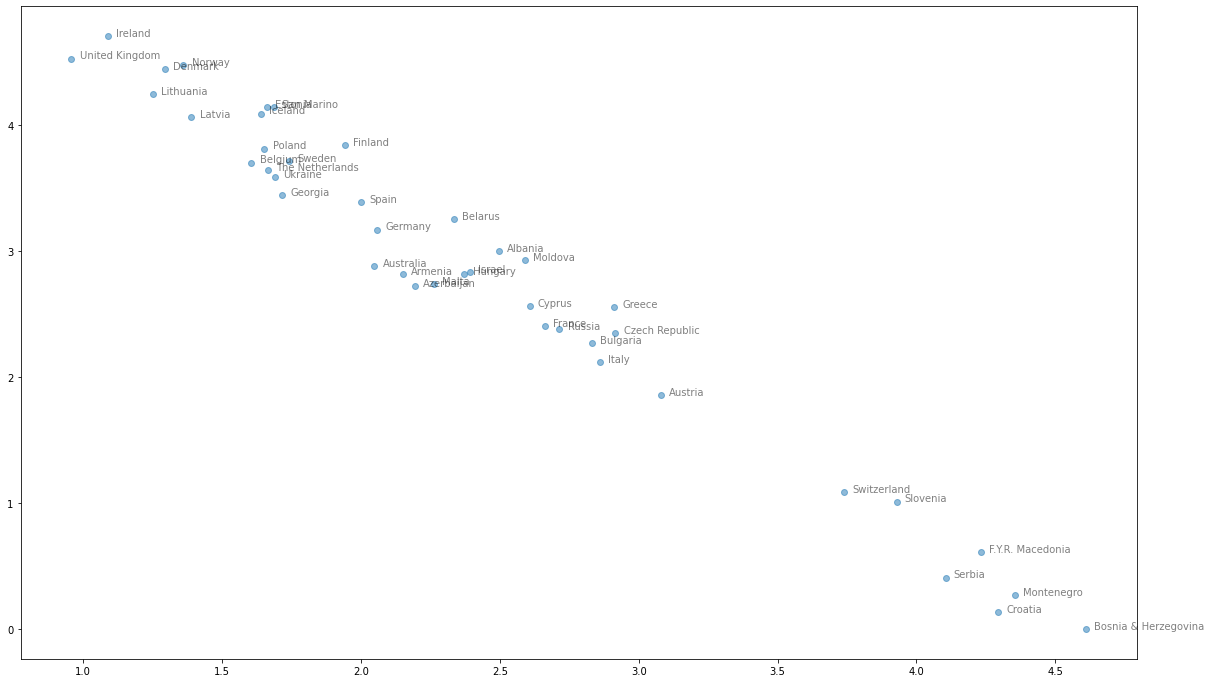

In [76]:
plt.figure(figsize=(20,12))

countries = np.array(televote_rank.index)
xs = nmf_features[:, 0]
ys = nmf_features[:, 1]

plt.scatter(xs, ys, alpha=0.5)

for x,y,countries in zip(xs, ys, countries):
    plt.annotate(countries, (x+0.03,y), fontsize=10, alpha=0.5)

plt.show()

## Manifold Learning with t-SNE

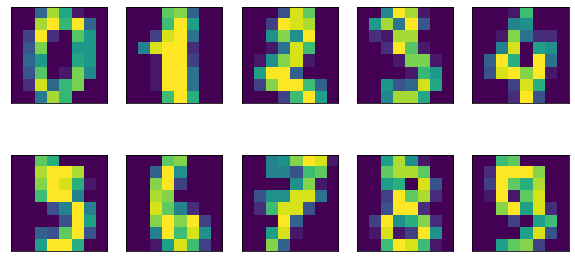

In [77]:
from sklearn.datasets import load_digits

digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5), subplot_kw={'xticks':(), 'yticks': ()})

for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)
    
plt.show()

In [78]:
digits.images.shape

(1797, 8, 8)

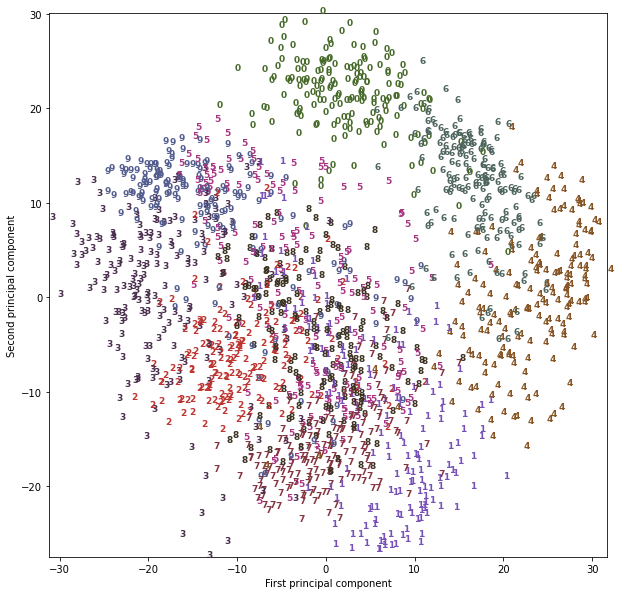

In [79]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)

# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)

colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]

plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.show()

In [80]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=200, init="random", random_state=42)

# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

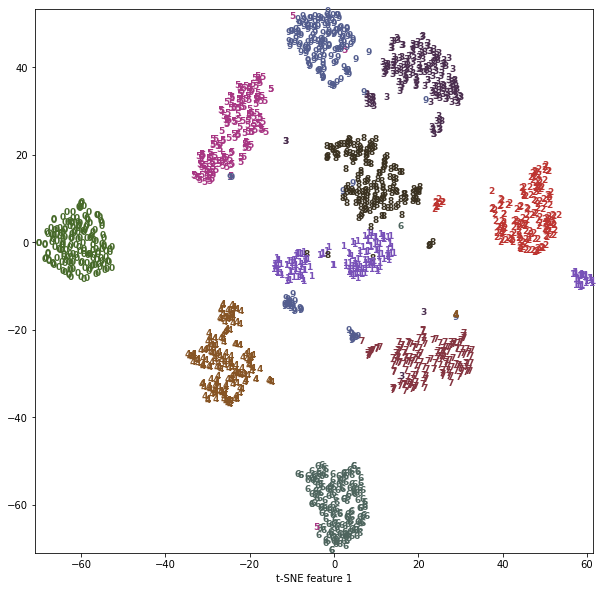

In [81]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)

for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})

plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")
plt.show()